In [1]:
from sklearn import ensemble, datasets
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from ucimlrepo import fetch_ucirepo

In [2]:
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80)
x = np.array(optical_recognition_of_handwritten_digits.data.features)
y = np.array(optical_recognition_of_handwritten_digits.data.targets).ravel()

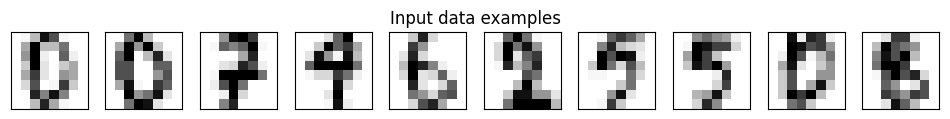

In [3]:
plt.figure(figsize=(12, 1))
plt.title("Input data examples")
plt.axis('off')
colormap = matplotlib.colormaps["Greys"]
for i in range(10):
  plt.subplot(1, 10, i + 1)
  plt.box(True)
  plt.xticks([])
  plt.yticks([])
  plt.grid(True)
  plt.imshow(np.resize(x[i], (8, 8)), cmap=colormap)
plt.show()

In [4]:
indices = np.random.choice(np.arange(len(x)), int(len(x)*0.95), replace=False)
rm_indices = np.delete(np.arange(len(x)), indices)
x_train, y_train = x[indices], y[indices]
x_test, y_test = x[rm_indices], y[rm_indices]

rfc = ensemble.RandomForestClassifier(n_estimators=100, max_depth=None)
bagged_rfc = ensemble.BaggingRegressor(rfc, n_jobs=-1)
bagged_rfc.fit(x_train, y_train)

BaggingRegressor(estimator=RandomForestClassifier(), n_jobs=-1)

In [5]:
y_pred = bagged_rfc.predict(x_test).astype(int)

In [6]:
error = (y_test == y_pred)
correct = sum(error)
incorrect = len(y_test) - correct
accuracy = correct / (correct + incorrect)

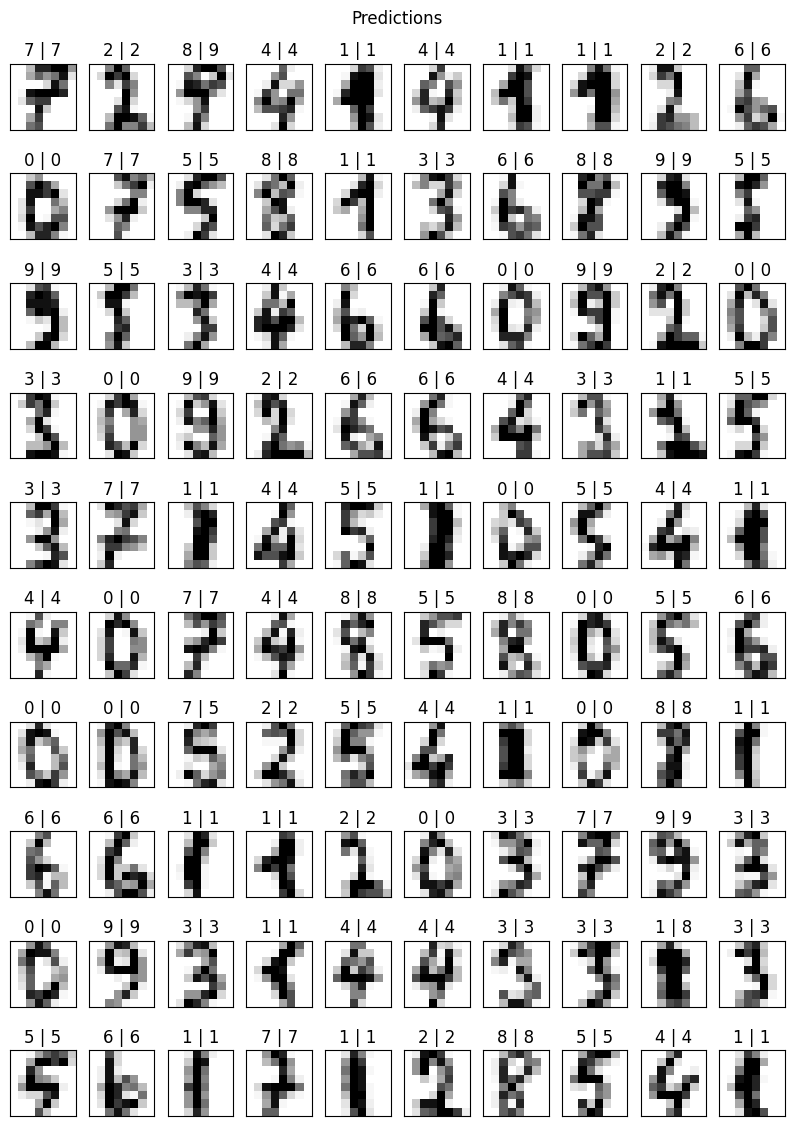

In [7]:
plt.figure(figsize=(10, 14))
plt.title("Predictions", pad=20)
plt.axis('off')
colormap = matplotlib.colormaps["Greys"]
for i in range(100):
  plt.subplot(10, 10, i + 1)
  plt.box(True)
  plt.xticks([])
  plt.yticks([])
  plt.grid(True)
  plt.title(f'{y_pred[i]} | {y_test[i]}')
  plt.imshow(np.resize(x_test[i], (8, 8)), cmap=colormap)
plt.show()

In [8]:
print(f'Accuracy: {accuracy} ({correct} / {correct + incorrect} correct)')

Accuracy: 0.9750889679715302 (274 / 281 correct)
